In [1]:
#wfdb, biosppy, numpy, and matplotlib packages, which are commonly used for working with physiological signal data and data visualization.
!pip install wfdb biosppy numpy matplotlib -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 11.2 MB/s eta 0:00:00


### Importing Python libraries for working with physiological signal data, data processing, and visualization

In [2]:
import gc
# used to manually control the garbage collector.
from tqdm import tqdm
# to monitor the progress of loops or tasks.
from scipy.signal import spectrogram
# for computing a spectrogram of a signal, which visualizes the frequency content of a signal over time.
import wfdb
# PhysioNet Waveform Database (WFDB) library, which is often used for reading and processing physiological signal data.
import biosppy
# biosignal processing library that provides tools for processing and analyzing physiological signals.
import numpy as np
# providing support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.
import os
# operating system interface module, which provides a way of interacting with the operating system, e.g., reading or writing files.
import math
# math module, providing mathematical functions beyond the built-in capabilities of Python.
import shutil
# module for file operations, such as copying, moving, and deleting files and directories.
import glob
# module for finding all the pathnames matching a specified pattern according to the rules used by the Unix shell.
import matplotlib.pyplot as plt
# plotting library for creating visualizations, including charts, plots, and graphs.
import warnings
warnings.filterwarnings('ignore')
# module for issuing and handling warnings.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os #Interacts with the operating system
import joblib #Efficient loading and saving of Python objects
import cv2

from tensorflow.keras import models
from tensorflow.keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow. keras import models, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


### Downloading Transform (NFST) Images ZIP file from Dropbox using the wget command

In [3]:
!wget https://www.dropbox.com/scl/fi/hvjk8jrn34qx7jwppti7z/Final_Stockwell_Transforms.zip?rlkey=x6v54qzxyq34z9f6zs8d6j6mi&dl=0

--2024-03-07 08:35:49--  https://www.dropbox.com/scl/fi/hvjk8jrn34qx7jwppti7z/Final_Stockwell_Transforms.zip?rlkey=x6v54qzxyq34z9f6zs8d6j6mi
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4b1a9a3c388698d186d1c9b9ff.dl.dropboxusercontent.com/cd/0/inline/COrgUJDb8-PJUszHeNXpsh1MqI69f-Zfezz2d2KH2Mo0U-4e3YkV2IipkSkTohwvRZsAyAQWK8Uuayb3MqmrplglZtGuLqC2d1sOtDPh_o3uh3FmE1DQxT3M8ZZpxx9VTwA/file# [following]
--2024-03-07 08:35:50--  https://uc4b1a9a3c388698d186d1c9b9ff.dl.dropboxusercontent.com/cd/0/inline/COrgUJDb8-PJUszHeNXpsh1MqI69f-Zfezz2d2KH2Mo0U-4e3YkV2IipkSkTohwvRZsAyAQWK8Uuayb3MqmrplglZtGuLqC2d1sOtDPh_o3uh3FmE1DQxT3M8ZZpxx9VTwA/file
Resolving uc4b1a9a3c388698d186d1c9b9ff.dl.dropboxusercontent.com (uc4b1a9a3c388698d186d1c9b9ff.dl.dropboxusercontent.com)... 162.125.65.15, 2620:100:6017:15::a27d:20f


In [4]:
!unzip Final_Stockwell_Transforms.zip?rlkey=x6v54qzxyq34z9f6zs8d6j6mi&dl=0

Streaming output truncated to the last 5000 lines.
  inflating: Final_Stockwell_Transforms/normal/b05_N_Normalized_Stockwell_144.png  
  inflating: Final_Stockwell_Transforms/normal/b05_N_Normalized_Stockwell_145.png  
  inflating: Final_Stockwell_Transforms/normal/b05_N_Normalized_Stockwell_146.png  
  inflating: Final_Stockwell_Transforms/normal/b05_N_Normalized_Stockwell_147.png  
  inflating: Final_Stockwell_Transforms/normal/b05_N_Normalized_Stockwell_148.png  
  inflating: Final_Stockwell_Transforms/normal/b05_N_Normalized_Stockwell_149.png  
  inflating: Final_Stockwell_Transforms/normal/b05_N_Normalized_Stockwell_15.png  
  inflating: Final_Stockwell_Transforms/normal/b05_N_Normalized_Stockwell_150.png  
  inflating: Final_Stockwell_Transforms/normal/b05_N_Normalized_Stockwell_151.png  
  inflating: Final_Stockwell_Transforms/normal/b05_N_Normalized_Stockwell_152.png  
  inflating: Final_Stockwell_Transforms/normal/b05_N_Normalized_Stockwell_153.png  
  inflating: Final_Stockwe

In [5]:
IMAGE_SIZE = 128
BATCH_SIZE = 16
EPOCHS=20
CHANNELS=3

In [6]:
#Image Size
path='/content/Final_Stockwell_Transforms/apnea/a01_A_Normalized_Stockwell_0.png'
pic=cv2.imread(path)
pic.shape

(570, 570, 3)

### Getting Total number of images in the "APNEA" and "Normal" folders

In [7]:
#image_dataset_from_directory allows you to
#create a dataset for image classification directly
#from a directory containing your image data

dataset = tf.keras.utils.image_dataset_from_directory(
    directory="/content/Final_Stockwell_Transforms",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 17026 files belonging to 2 classes.


In [8]:
class_names = dataset.class_names
print(class_names)
# Output: List of class names
#apnea,normal

['apnea', 'normal']


In [9]:
class_names[0],class_names[1]

('apnea', 'normal')

In [10]:
len(dataset)

1065

In [11]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

#16: This batch contains 16 images.
#128: The images have a height of 128 pixels.
#128: The images have a width of 128 pixels.
#3: Each pixel has three color channels (Red, Green, Blue).

#The label_batch contains 32 elements corresponding to
#the labels for each image in the batch.

#Image 1 corresponds to label 1
#Image 2 corresponds to label 0

(16, 128, 128, 3)
[1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1]


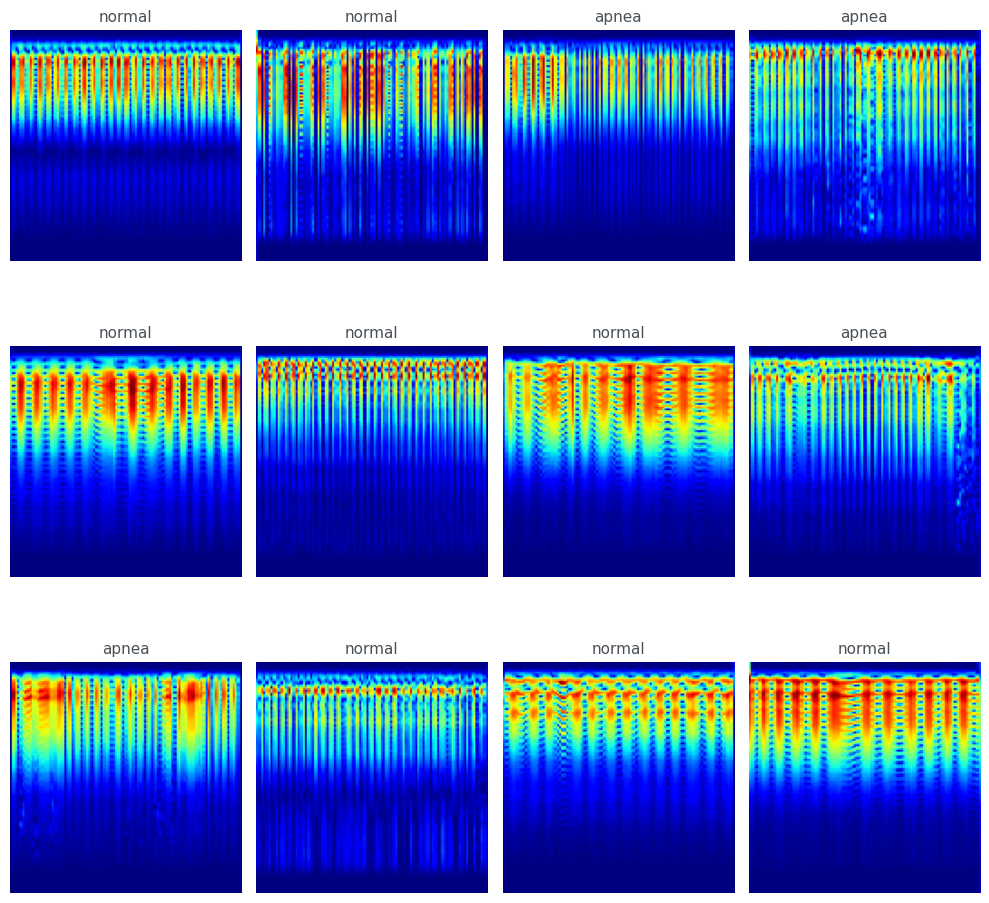

In [12]:
#visualize a selection of images from the dataset,
#along with their corresponding labels, using Matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):  # Assuming you want only the first batch for visualization
    for i in range(12):  # Visualizing 12 images from the batch
        ax = plt.subplot(3, 4, i + 1)  # Creating subplots in a 3x4 grid
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # Displaying the image
        plt.title(class_names[label_batch[i]])  # Setting the title with the label
        plt.axis("off")  # Turning off axis labels
    plt.tight_layout()  # Adjusting subplot layout for better display
    plt.show()  # Displaying the plot

###  Creating Training Testing and Validation split for dataset and organizing it into separate folders for each class ('apnea' and 'normal').

In [13]:
#Function to partition dataset into training, validation, and test sets
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.15, test_split=0.15, shuffle=True, shuffle_size=1000, seed=12):
    ds_size = len(dataset)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=seed)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [14]:
# Function Call to partition a dataset into training, validation, and test sets
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [15]:
#Type of training, validation, and test sets
train_ds,val_ds,test_ds

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_SkipDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [16]:
#Training Data: 426,#Set represents 80% of the dataset,
#Validation Data: 53
#Testing Data: 54
#the validation set represents 10%
#test set represents 10%.

print("Length of Training Data:",len(train_ds))
print("Length of Validation Data:",len(val_ds))
print("Length of Testing Data:",len(test_ds))

Length of Training Data: 745
Length of Validation Data: 159
Length of Testing Data: 161


In [17]:
#helps in improving training performance by optimizing data loading and preprocessing,
#ensuring that the data pipeline remains efficient during model training.
train_ds=train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)  # Example with AUTOTUNE
test_ds=test_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)  # Example with AUTOTUNE
val_ds=val_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)  # Example with AUTOTUNE

In [18]:
#allowing for consistent input sizes and scaling the pixel values for improved model training
#used for standardizing or resizing images to a consistent size
#before they are fed into a neural network model.

#divides each pixel value by 255.0,
#converting them from the 0-255 range (common for RGB images) to the 0-1 range,
#making the data suitable for neural networks.

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
#Data augmentation sequence with RandomFlip,RandomRotation,Zoom Range and Shear Range in preprocessing layers.
#to introduce variety and prevent overfitting in learning model
# Define data augmentation sequence

# Define data augmentation sequence
from tensorflow.keras.layers.experimental import preprocessing

# Define data augmentation sequence
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(factor=0.2),
])


In [20]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2  # number of output classes is 2

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

def channel_attention(input_tensor, reduction_ratio=8):
    channels = input_tensor.shape[-1]
    avg_pool = layers.GlobalAveragePooling2D()(input_tensor)
    dense_layer = layers.Dense(channels // reduction_ratio, activation='relu')(avg_pool)
    attention = layers.Dense(channels, activation='sigmoid')(dense_layer)
    attention = tf.expand_dims(attention, axis=1)
    attention = tf.expand_dims(attention, axis=1)
    return input_tensor * attention

def spatial_attention(input_tensor):
    avg_pool = layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_tensor)
    max_pool = layers.Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_tensor)
    concatenated = layers.Concatenate(axis=-1)([avg_pool, max_pool])
    attention = layers.Conv2D(filters=1, kernel_size=(3, 3), padding='same', activation='sigmoid')(concatenated)
    return input_tensor * attention

def residual_block(input_tensor, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu'):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    if strides != (1, 1) or input_tensor.shape[-1] != filters:
        input_tensor = layers.Conv2D(filters, (1, 1), strides=strides, padding='same')(input_tensor)
    x = layers.add([x, input_tensor])
    x = layers.Activation(activation)(x)
    return x

def attention_residual_cnn(input_shape, num_classes):
    input_layer = layers.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = layers.BatchNormalization()(x)

    # Residual blocks with attention
    for _ in range(3):
        x = residual_block(x, 32)

    x = channel_attention(x)
    x = spatial_attention(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Residual blocks with attention
    for _ in range(3):
        x = residual_block(x, 64)

    x = channel_attention(x)
    x = spatial_attention(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Residual blocks with attention
    for _ in range(3):
        x = residual_block(x, 128)

    x = channel_attention(x)
    x = spatial_attention(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output_layer = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# Example usage:
input_shape = (128, 128, 3)  # Example input shape
num_classes = 2  # Example number of classes
model = attention_residual_cnn(input_shape, num_classes)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 32)         9248      ['batch_normalization[0][0

## Base Code

# Import necessary libraries
from tensorflow.keras import layers, models

# Initialize the model
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,

    # Input shape: (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Adding Dropout with a rate of 0.5

    # The final output layer with the number of units equal to n_classes
    # and softmax activation for multi-class classification.
    layers.Dense(n_classes, activation='softmax')
])


In [22]:
# Print a summary of the model architecture
model.build(input_shape=input_shape)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 32)         9248      ['batch_normalization[0][0

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
base_model_checkpoint = tf.keras.callbacks.ModelCheckpoint('CNN_Srini_Stockwell_Final_bestmodel.h5',
                                                           save_best_only=True,#best model will be saved.
                                                           monitor='val_accuracy',#monitors the validation accuracy to determine the best model
                                                           mode='max', #goal is to maximize the monitored validation accuracy)
                                                           verbose=1) #verbosity of the output during training.

In [25]:
history = model.fit(
    train_ds,  # Training dataset
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,  # Adjust verbosity: 0 for silent, 1 for progress bar, 2 for one line per epoch
    validation_data=val_ds,  # Validation dataset
    callbacks=[base_model_checkpoint]
)

Epoch 1/20
745/745 [==============================] - ETA: 0s - loss: 0.9565 - accuracy: 0.6109
Epoch 1: val_accuracy improved from -inf to 0.62736, saving model to CNN_Srini_Stockwell_Final_bestmodel.h5
745/745 [==============================] - 237s 218ms/step - loss: 0.9565 - accuracy: 0.6109 - val_loss: 0.5780 - val_accuracy: 0.6274
Epoch 2/20
745/745 [==============================] - ETA: 0s - loss: 0.5588 - accuracy: 0.6681
Epoch 2: val_accuracy improved from 0.62736 to 0.74057, saving model to CNN_Srini_Stockwell_Final_bestmodel.h5
745/745 [==============================] - 109s 146ms/step - loss: 0.5588 - accuracy: 0.6681 - val_loss: 0.4873 - val_accuracy: 0.7406
Epoch 3/20
745/745 [==============================] - ETA: 0s - loss: 0.5263 - accuracy: 0.6857
Epoch 3: val_accuracy did not improve from 0.74057
745/745 [==============================] - 107s 144ms/step - loss: 0.5263 - accuracy: 0.6857 - val_loss: 0.4874 - val_accuracy: 0.6710
Epoch 4/20
745/745 [=================

In [26]:
#computes the loss and metrics of the model on the test dataset
#method helps in assessing how well the trained model performs on unseen data
scores = model.evaluate(test_ds)

161/161 [==============================] - 59s 35ms/step - loss: 0.1737 - accuracy: 0.9387


In [27]:
#computes the loss and metrics of the model on the validation dataset
#method helps in assessing how well the trained model performs on unseen data
scores = model.evaluate(val_ds)

159/159 [==============================] - 5s 34ms/step - loss: 0.1532 - accuracy: 0.9395


### list of keys present in the history object useful for identifying the available metrics and values recorded during the training process

In [28]:
history

In [29]:
#Accessing history.params after training provides a quick way to review the key training parameters
#that were set when the model was trained.
history.params

{'verbose': 1, 'epochs': 20, 'steps': 745}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
#for visualizing the model's performance over each epoch.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [32]:
model.save('/content/CNN_Srini_Stockwell_Final_bestmodel.h5')

### Plotting Training Accuracy and Validation Accuracy over epochs from training history (h)

### Plotting Training Accuracy and Validation Accuracy over epochs from training history (h)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


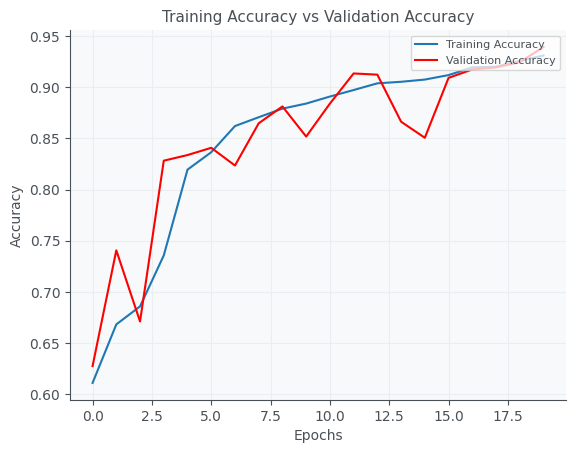

In [33]:
h = history.history
print(h.keys())
import matplotlib.pyplot as plt
# Assuming 'accuracy' and 'val_accuracy' are available in h (history)
plt.plot(h['accuracy'], label='Training Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Plotting training loss and validation loss

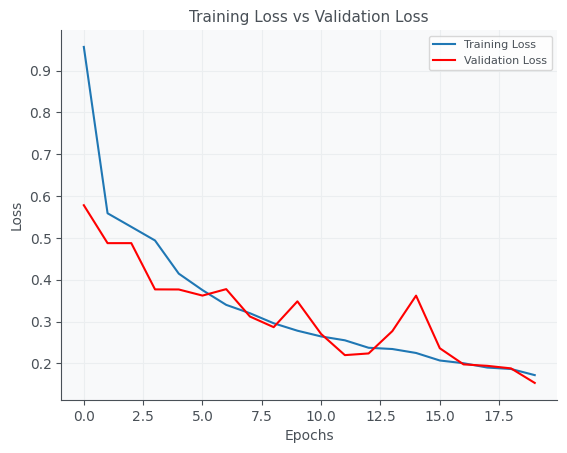

In [34]:
import matplotlib.pyplot as plt
# Assuming 'loss' and 'val_loss' are available in h (history)
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss', color='red')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

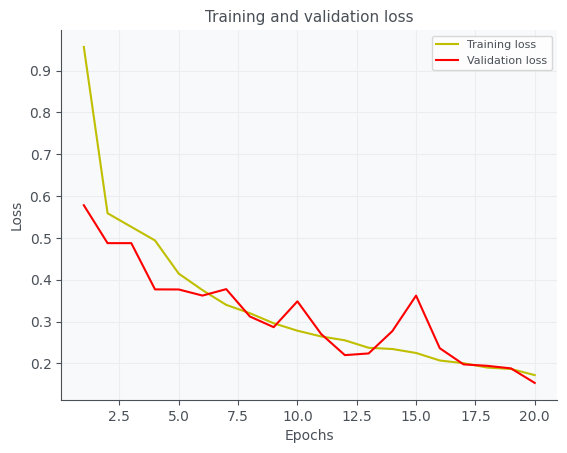

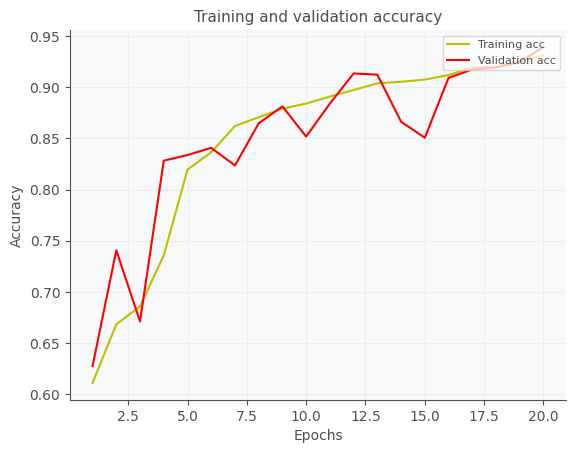

In [35]:
# Assuming you've trained a model and stored the history in a variable named 'history'

# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
# Check the keys available in your history object for accuracy
# It might be 'accuracy' instead of 'acc' in newer versions
acc_key = 'accuracy' if 'accuracy' in history.history else 'acc'
val_acc_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_acc'

acc = history.history[acc_key]
val_acc = history.history[val_acc_key]

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


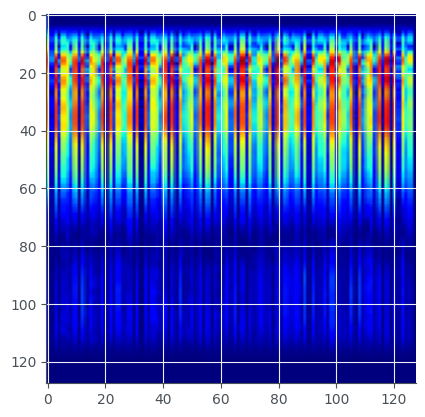

In [36]:
# to display an image from the first batch of the test_ds dataset using Matplotlib

for images_batch, labels_batch in test_ds.take(1):  # Assuming you want to take the first batch

        plt.imshow(images_batch[0].numpy().astype('uint8'))  # Display the image using Matplotlib

In [37]:
#display the numerical pixel values of the first image in the batch in the form of a NumPy array,
#showing the RGB (or grayscale) values for each pixel.

for images_batch, labels_batch in test_ds.take(1):  # Assuming you want to take the first batch

        print(images_batch[0].numpy().astype('uint8'))  # Display the image using Matplotlib

[[[  0   0 127]
  [  0   0 127]
  [  0   0 127]
  ...
  [  0   0 132]
  [  0   0 132]
  [  0   0 150]]

 [[  0   0 127]
  [  0   0 127]
  [  0   0 127]
  ...
  [  0   0 132]
  [  0   0 132]
  [  0   0 150]]

 [[  0   0 132]
  [  0   0 127]
  [  0   0 127]
  ...
  [  0   0 132]
  [  0   0 132]
  [  0   0 154]]

 ...

 [[  0   0 127]
  [  0   0 127]
  [  0   0 127]
  ...
  [  0   0 127]
  [  0   0 127]
  [  0   0 132]]

 [[  0   0 127]
  [  0   0 127]
  [  0   0 127]
  ...
  [  0   0 127]
  [  0   0 127]
  [  0   0 132]]

 [[  0   0 127]
  [  0   0 127]
  [  0   0 127]
  ...
  [  0   0 127]
  [  0   0 127]
  [  0   0 132]]]


## Single Image Prediction

First image to predict
Actual label: normal
1/1 [==============================] - 1s 774ms/step
Predicted label: normal


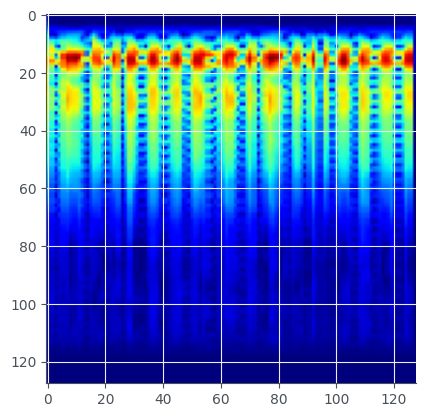

In [38]:
import numpy as np
#Extract the first image and its label from the test dataset.

for images_batch, labels_batch in test_ds.take(1):  # Assuming you want to take the first batch
    first_image = (images_batch[0].numpy().astype('uint8'))  # Display the image using Matplotlib
    first_label = labels_batch[0].numpy()
#Display the first image using Matplotlib.

    print("First image to predict")
    plt.imshow(first_image)
#Print the actual label for the first image.
    print("Actual label:", class_names[first_label])

#Make predictions using the trained model on the batch of images and print the predicted label for the first image in the batch.
    batch_prediction = model.predict(images_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [39]:
# for making predictions on a single image using a provided model

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch by adding an extra dimension

    predictions = model.predict(img_array)  # Make predictions on the image batch

    predicted_class = class_names[np.argmax(predictions[0])]  # Get the index of the highest predicted probability
    confidence = round(100*(np.argmax(predictions[0])),2)  # Get the confidence of the prediction

    return predicted_class, confidence
# returns the predicted class and the confidence level of the prediction.

## Batch Prediction

1/1 [==============================] - 0s 22ms/step


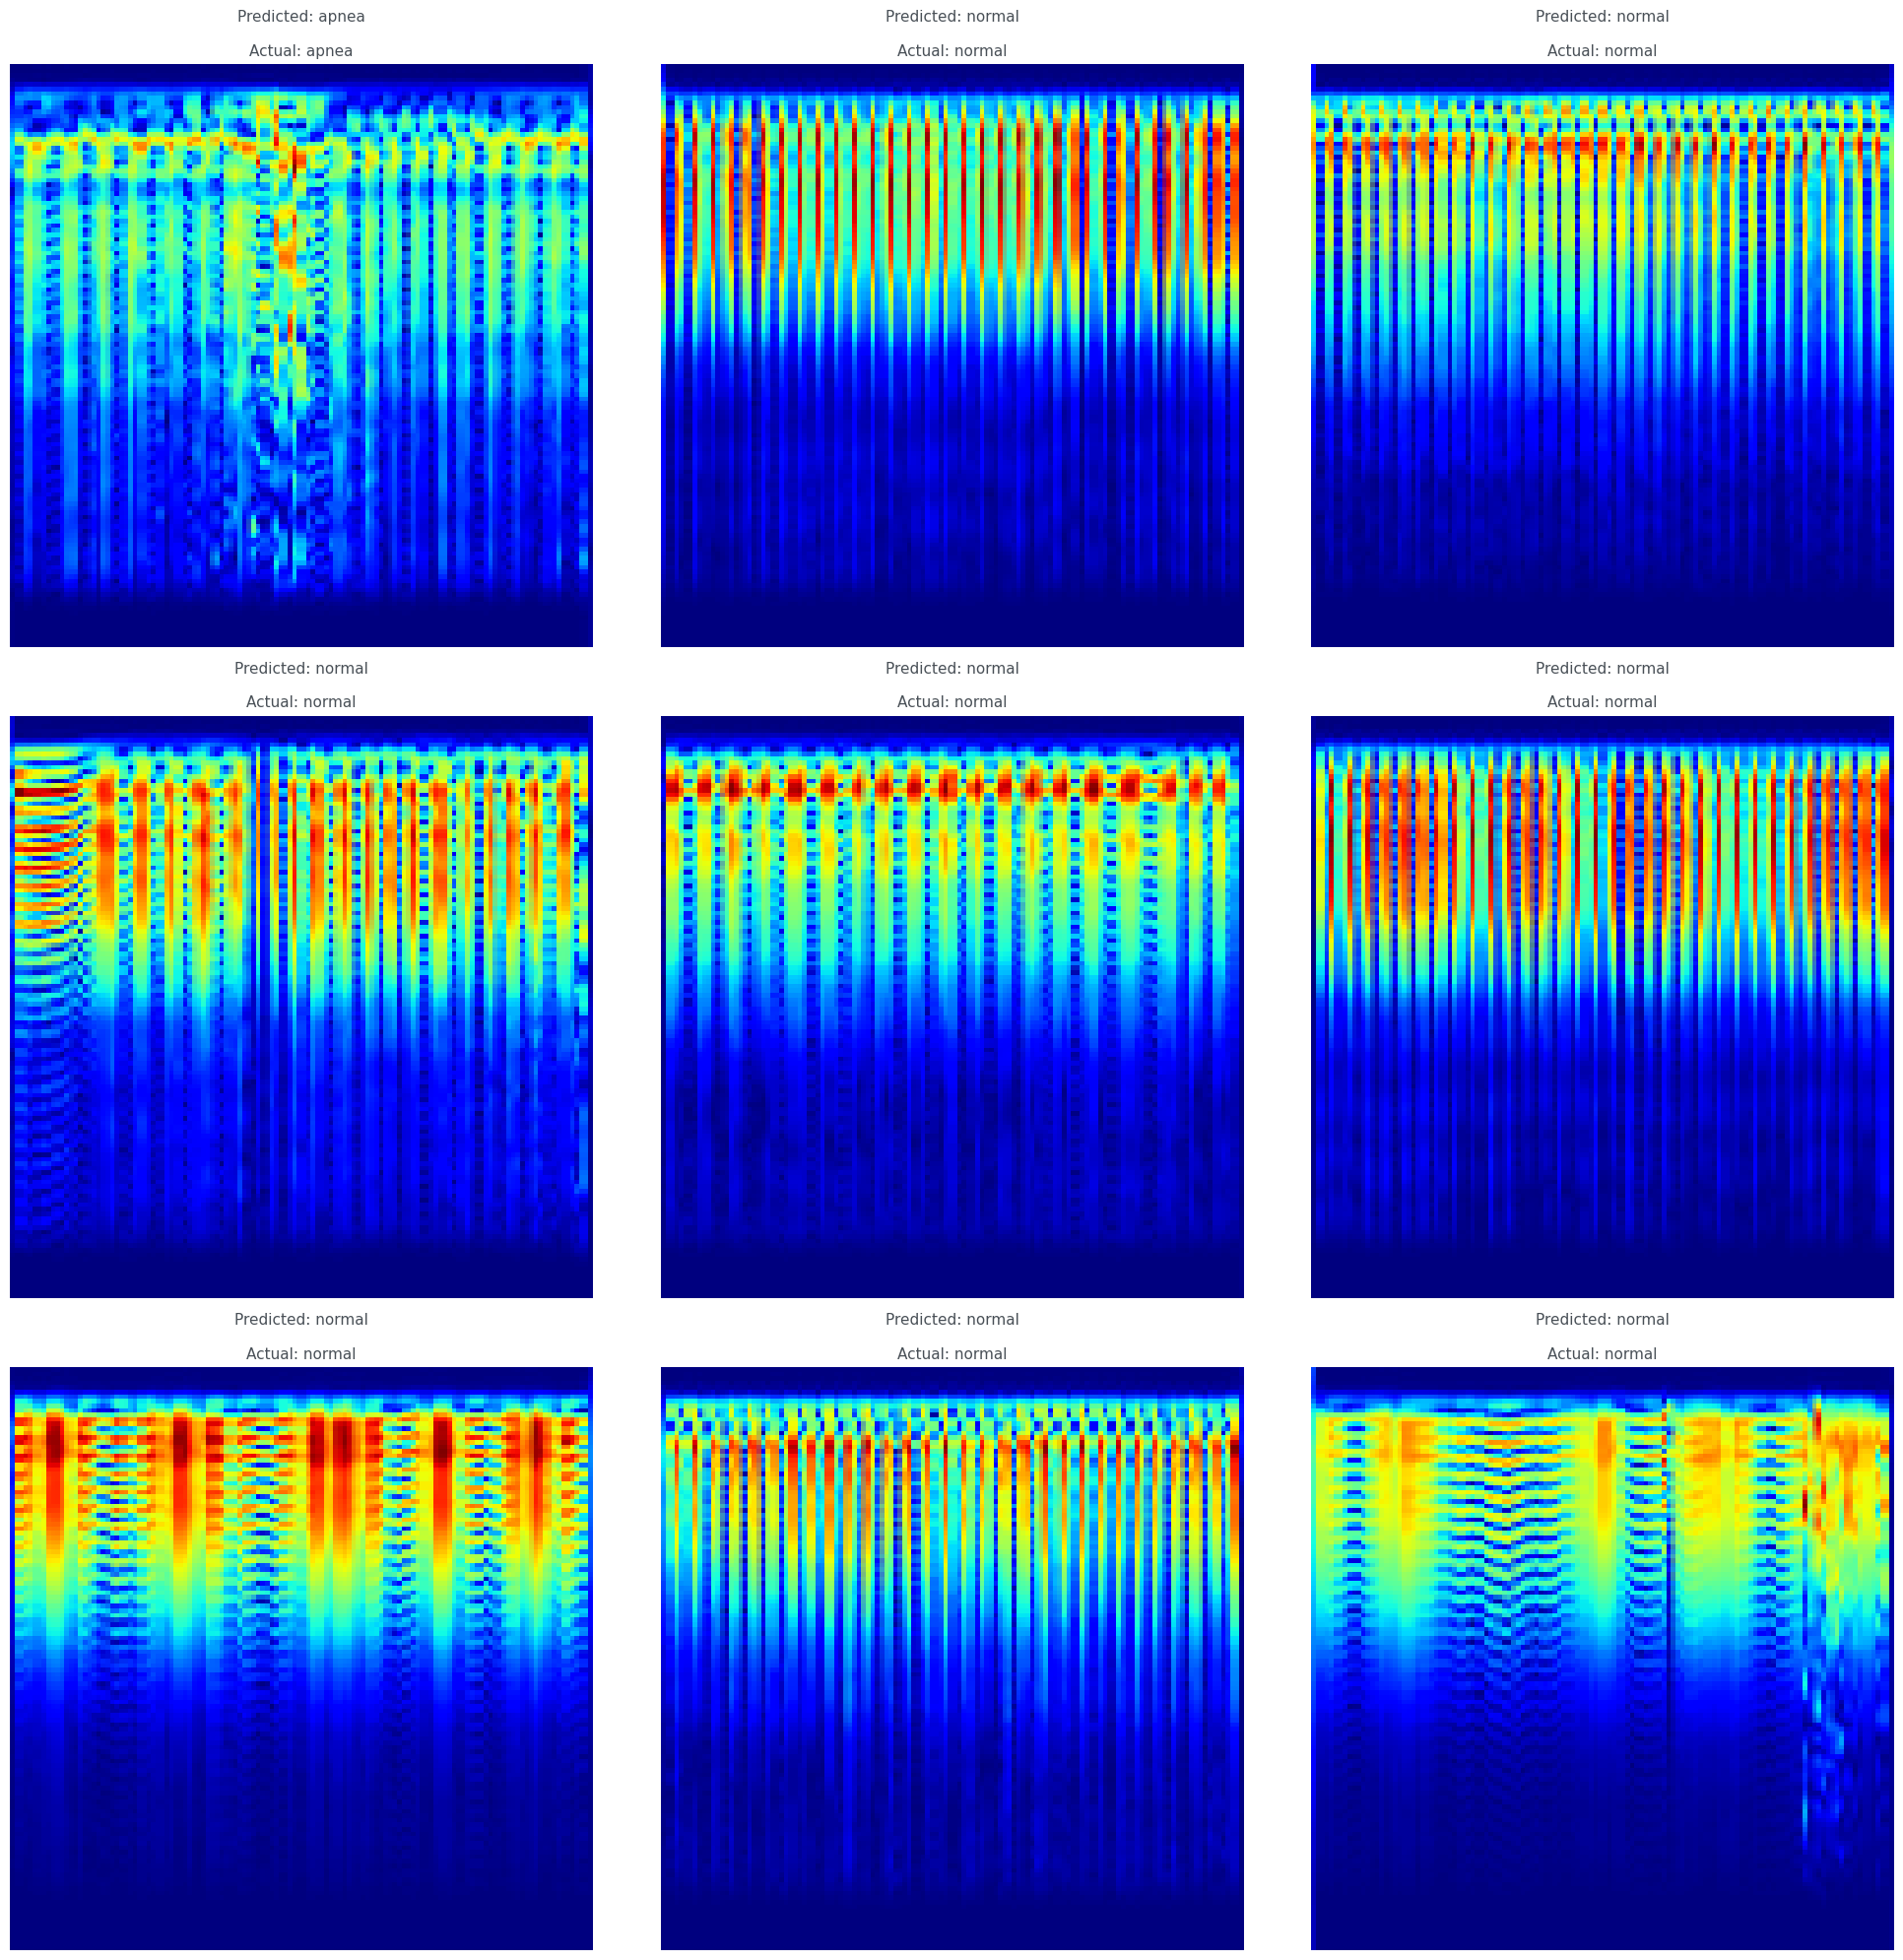

In [40]:
# visual comparison between the predicted and actual labels for a set of 9 images from the test dataset
plt.figure(figsize=(20, 20))

for images, labels in test_ds.take(1):  # Assuming you want to take the first batch
    for i in range(9):  # Visualizing 9 images from the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert image tensor to a NumPy array

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]  # Assuming labels are indices

        plt.title(f"Predicted: {predicted_class}\n\nActual: {actual_class}")
        plt.axis("off")

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 22ms/step


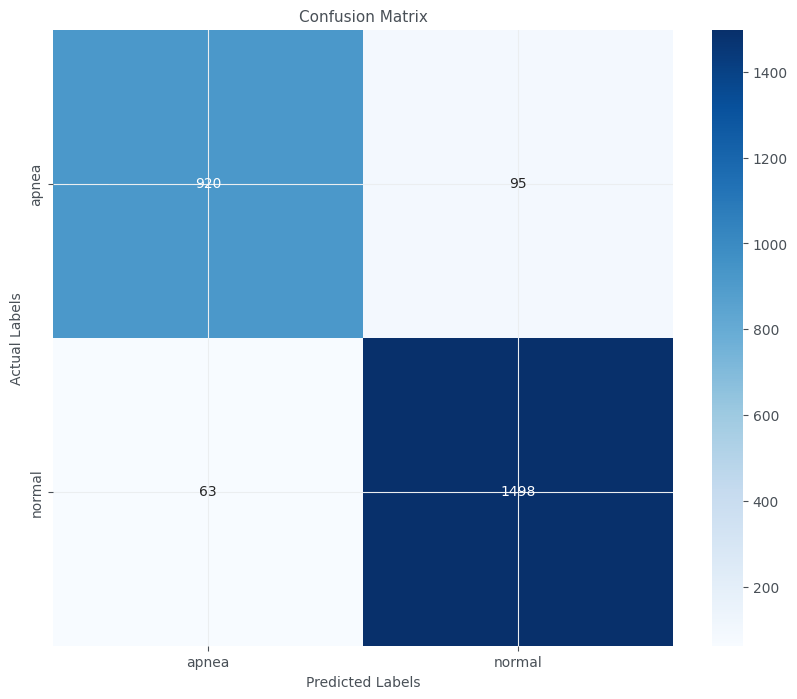

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a function 'predict' that returns predicted class and confidence
def predict(model, image):
    # Your prediction logic here
    # Example: Replace this with your actual prediction code
    predicted_class = np.argmax(model.predict(np.expand_dims(image, axis=0)), axis=-1)[0]
    confidence = 1.0  # Placeholder for confidence, replace with actual confidence value
    return predicted_class, confidence

# Collect actual and predicted labels for all images in the test set
actual_labels = []
predicted_labels = []

for images, labels in test_ds:
    for i in range(len(images)):
        actual_labels.append(labels[i].numpy())
        predicted_class, _ = predict(model, images[i].numpy())
        predicted_labels.append(predicted_class)

# Create confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()


##  Confusion Matrix

1/1 [==============================] - 0s 30ms/step


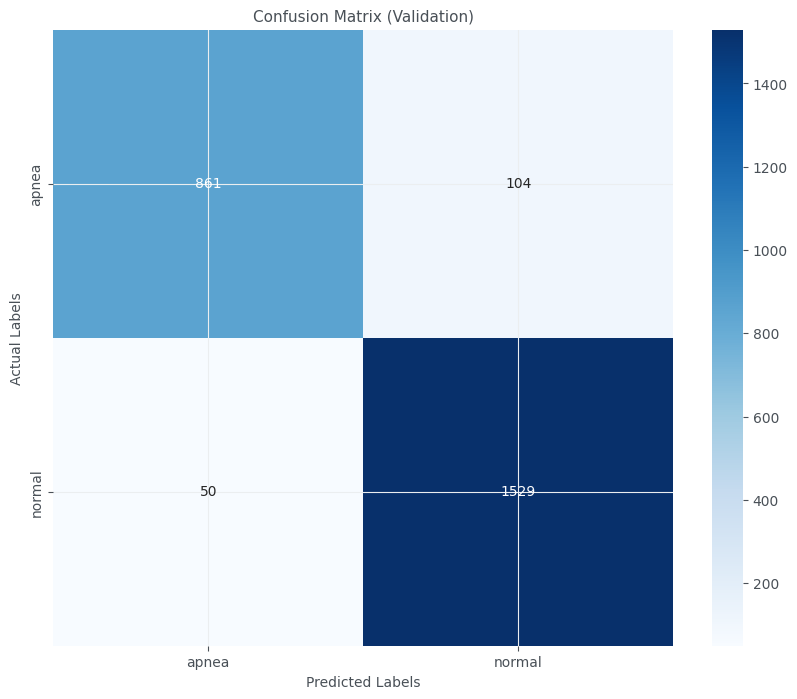

In [42]:
# Create confusion matrix
actual_labels = []
predicted_labels = []

for images, labels in val_ds:
    for i in range(len(images)):
        actual_labels.append(labels[i].numpy())
        predicted_class, _ = predict(model, images[i].numpy())
        predicted_labels.append(predicted_class)

conf_matrix_val = confusion_matrix(actual_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix (Validation)")
plt.show()


## Performance Parameters

In [43]:
# Calculate specificity, recall, precision, and accuracy
tn, fp, fn, tp = conf_matrix_val.ravel()

specificity_val = tn / (tn + fp)
recall_val = tp / (tp + fn)
precision_val = tp / (tp + fp)
accuracy_val = (tp + tn) / (tp + tn + fp + fn)

# Print the results for the validation dataset
print("Specificity (Validation):", specificity_val)
print("Recall (Validation):", recall_val)
print("Precision (Validation):", precision_val)
print("Accuracy (Validation):", accuracy_val)


Specificity (Validation): 0.8922279792746114
Recall (Validation): 0.9683343888537049
Precision (Validation): 0.936313533374158
Accuracy (Validation): 0.9394654088050315


## Classification Report-Average

In [44]:
# Import necessary libraries
from sklearn.metrics import classification_report

# Assuming you have a function 'predict' that returns predicted class and confidence
def predict(model, image):
    # Your prediction logic here
    # Example: Replace this with your actual prediction code
    predicted_class = np.argmax(model.predict(np.expand_dims(image, axis=0)), axis=-1)[0]
    confidence = 1.0  # Placeholder for confidence, replace with actual confidence value
    return predicted_class, confidence

# Lists to store true and predicted labels
true_labels = []
predicted_labels = []

for images, labels in val_ds:
    for i in range(len(images)):
        predicted_class, _ = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]  # Assuming labels are indices

        # Append true and predicted labels
        true_labels.append(actual_class)
        predicted_labels.append(class_names[predicted_class])

# Generate classification report
classification_report_result = classification_report(true_labels, predicted_labels)

# Print the classification report
print(classification_report_result)


1/1 [==============================] - 0s 34ms/step
              precision    recall  f1-score   support

       apnea       0.95      0.89      0.92       965
      normal       0.94      0.97      0.95      1579

    accuracy                           0.94      2544
   macro avg       0.94      0.93      0.93      2544
weighted avg       0.94      0.94      0.94      2544



In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

# Create confusion matrix
actual_labels = []
predicted_labels = []

for images, labels in val_ds:
    for i in range(len(images)):
        actual_labels.append(labels[i].numpy())
        predicted_class, _ = predict(model, images[i].numpy())  # Assuming you have a predict function
        predicted_labels.append(predicted_class)

conf_matrix_val = confusion_matrix(actual_labels, predicted_labels)

# Calculate metrics
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
f1 = f1_score(actual_labels, predicted_labels, average='weighted')
kappa = cohen_kappa_score(actual_labels, predicted_labels)
mcc = matthews_corrcoef(actual_labels, predicted_labels)

# Compute true negatives, false positives, false negatives, true positives
tn, fp, fn, tp = confusion_matrix(actual_labels, predicted_labels).ravel()

# Calculate additional metrics
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
negative_predictive_value = tn / (tn + fn)
false_negative_rate = fn / (fn + tp)
false_discovery_rate = fp / (fp + tp)
false_positive_rate = fp / (fp + tn)

# Display the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient:", mcc)
print("Specificity:", specificity)
print("Negative Predictive Value:", negative_predictive_value)
print("False Negative Rate:", false_negative_rate)
print("False Discovery Rate:", false_discovery_rate)
print("False Positive Rate:", false_positive_rate)


1/1 [==============================] - 0s 25ms/step
Accuracy: 0.9394654088050315
Precision: 0.9396522378646002
Recall (Sensitivity): 0.9394654088050315
F1 Score: 0.9391030277663119
Kappa Coefficient: 0.870028139072439
Matthews Correlation Coefficient: 0.870933090429758
Specificity: 0.8922279792746114
Negative Predictive Value: 0.9451152579582875
False Negative Rate: 0.031665611146295125
False Discovery Rate: 0.06368646662584201
False Positive Rate: 0.1077720207253886


## Receiver Operating Characteristic (ROC) Curve

1/1 [==============================] - 0s 21ms/step


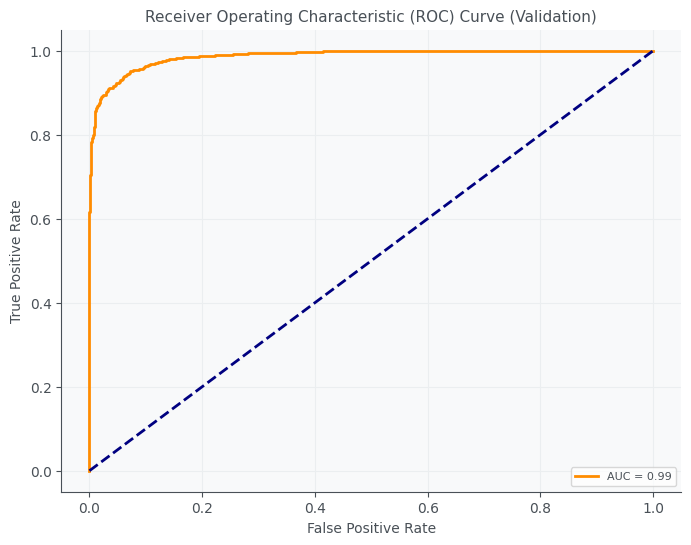

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a function 'predict_proba' that returns class probabilities
def predict_proba(model, image):
    # Your prediction logic here
    # Example: Replace this with your actual prediction code
    predicted_prob = model.predict(np.expand_dims(image, axis=0))[0][1]
    return predicted_prob

# Collect actual labels and predicted probabilities for all images in the validation set
true_labels_roc = []
predicted_probs_roc = []

for images, labels in val_ds:
    for i in range(len(images)):
        true_labels_roc.append(labels[i].numpy())
        predicted_probs_roc.append(predict_proba(model, images[i].numpy()))

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(true_labels_roc, predicted_probs_roc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Validation)')
plt.legend(loc='lower right')
plt.show()
